<a href="https://colab.research.google.com/github/mr1er0y/Topic-Modelling-Neuro/blob/main/model_BERT_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Классификация текста с помощью глубоких нейронных сетей

Глубокие нейронные сети также используются для обработки естественного языка(NLP). Они могут представлять более сложные зависимости между словами и могут использоваться для решения различных задач, таких как классификация, машинный перевод и генерация текста. Глубокие нейронные сети могут обучаться на больших объемах данных. Однако они могут быть очень сложными в обучении и настройке, могут страдать от проблемы переобучения из-за большого количества



## Про BERT

[BERT](https://arxiv.org/abs/1810.04805 ) и другие архитектуры трансформаторных кодировщиков были чрезвычайно успешны при решении различных задач в NLP (обработка естественного языка). Они вычисляют представления естественного языка в векторном пространстве, которые подходят для использования в моделях глубокого обучения. Семейство моделей BERT использует архитектуру Transformer encoder для обработки каждого токена входного текста в полном контексте всех токенов до и после, отсюда и название: Двунаправленные представления кодера от Transformers.

Модели BERT обычно предварительно обучаются на большом объеме текста, а затем точно настраиваются для конкретных задач.


## Setup


In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# A dependency of the preprocessing for BERT inputs
!pip install -q -U "tensorflow-text==2.11.*"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 49.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 85.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 78.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 109.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 45.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 107.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-datasets 4.9.2 requires protobuf>=3.20, but you have protobuf 3.19.6 which is incompatible.
tensorflow-metadata 1.13.1 requires protobuf<5,>=3.20.3, but you have protobuf 3.19.6 which is incompatible.


Вы будете использовать оптимизатор AdamW из [tensorflow/models](https://github.com/tensorflow/models ).

In [ ]:
!pip install -q tf-models-official

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.1/175.1 kB 20.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 54.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 49.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.6/240.6 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 87.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 84.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━

In [ ]:
import os
import shutil

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optimizer

import matplotlib.pyplot as plt

tf.get_logger().setLevel('ERROR')

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


## Топик  моделинг

Этот блокнот обучает модель multi-label classification топиков, основываясь на тексте анотации и на заголовке статьи.

Мы будем использовать [Arxiv Dataset](https://www.kaggle.com/datasets/Cornell-University/arxiv), содержащий метаданные более 2,2 миллионов научных статей из [ArXiv](https://arxiv.org).

Обработанный datasets лежит на [GitHub](https://github.com/mr1er0y/Topic-Modelling-Neuro)

### Download dataset



In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer

path = "drive/MyDrive/Data_arXiv/filtered_arxiv_db.csv"
SEED = 77

df = pd.read_csv(path)
df[['created_date', 'update_date']] = df[['created_date', 'update_date']].apply(pd.to_datetime)
df = df.drop(['versions', 'description', 'new_category', 'sub_category'], axis=1)
df.columns = ['id', 'title', 'authors', 'category', 'published_date', 'updated_date', 'abstract']
df["category"] = df["category"].apply(eval)
df.head()

<ipython-input-6-3a43babeff65>:8: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


,id,title,authors,category,published_date,updated_date,abstract
0,704.0033,Convergence of the discrete dipole approximati...,"Maxim A. Yurkin, Valeri P. Maltsev, Alfons G. ...","[physics.optics, physics.comp-ph]",2022-03-29,2022-03-31,We performed a rigorous theoretical converge...
1,704.0038,The discrete dipole approximation: an overview...,"Maxim A. Yurkin, Alfons G. Hoekstra","[physics.optics, physics.comp-ph]",2022-03-29,2022-03-30,We present a review of the discrete dipole a...
2,704.0275,Mapping radii of metric spaces,George M. Bergman (U.C.Berkeley),[math.MG],2008-03-28,2021-10-15,It is known that every closed curve of lengt...
3,704.0479,The affine part of the Picard scheme,T.Geisser,"[math.AG, math.KT]",2021-01-28,2021-01-29,We describe the maximal torus and maximal un...
4,704.0752,Actions for the Bosonic String with the Curved...,Davoud Kamani,[hep-th],2008-04-18,2020-08-21,At first we introduce an action for the stri...


In [ ]:
# Extract the categories column as a list of lists
categories = []
for el in df["category"]:
    categories.extend(el)
categories = np.unique(categories)
num_categories = len(categories)

# Initialize the MultiLabelBinarizer and fit_transform the categories
mlb = MultiLabelBinarizer()
df['labels'] =  mlb.fit_transform(df["category"].values).tolist()

In [ ]:
def preprocessing(data):
    data = data[data['abstract'].str.contains('paper has been withdrawn') == False]
    data['abstract'] = [a.strip() for a in data['abstract']]
    data['abstract'] = data['abstract'].str.replace('\n', ' ', regex = False).str.replace('\t', ' ', regex = False).str.replace(r'\s\s+', ' ', regex = True)
    data['abstract'] = data['abstract'].str.replace('([.,!?()])', r' \1 ')
    return data

df = preprocessing(df)
df.head()

<ipython-input-8-49d618440979>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  data['abstract'] = data['abstract'].str.replace('([.,!?()])', r' \1 ')


,id,title,authors,category,published_date,updated_date,abstract,labels
0,704.0033,Convergence of the discrete dipole approximati...,"Maxim A. Yurkin, Valeri P. Maltsev, Alfons G. ...","[physics.optics, physics.comp-ph]",2022-03-29,2022-03-31,We performed a rigorous theoretical convergenc...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,704.0038,The discrete dipole approximation: an overview...,"Maxim A. Yurkin, Alfons G. Hoekstra","[physics.optics, physics.comp-ph]",2022-03-29,2022-03-30,We present a review of the discrete dipole app...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,704.0275,Mapping radii of metric spaces,George M. Bergman (U.C.Berkeley),[math.MG],2008-03-28,2021-10-15,It is known that every closed curve of length ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,704.0479,The affine part of the Picard scheme,T.Geisser,"[math.AG, math.KT]",2021-01-28,2021-01-29,We describe the maximal torus and maximal unip...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,704.0752,Actions for the Bosonic String with the Curved...,Davoud Kamani,[hep-th],2008-04-18,2020-08-21,At first we introduce an action for the string...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [ ]:
df['unifed_text'] = df['title'] + '[SEP]' + df['abstract'] + '[SEP]'

## Загрузка моделей из TensorFlow Hub

Здесь вы можете выбрать, какую модель BERT вы будете загружать из TensorFlow Hub, и выполнить точную настройку. Доступно несколько моделей BERT.

- [BERT-Base](https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3 ), [Uncased](https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3 ) и [еще семь моделей](https://tfhub.dev/google/collections/bert/1 ) с обученными весами, выпущенными оригинальными авторами BERT.
- [Small BERTs](https://tfhub.dev/google/collections/bert/1 ) имеют ту же общую архитектуру, но меньшее количество и / или меньшие размеры блоков-трансформеров, что позволяет вам искать компромиссы между скоростью, размером и качеством.
- [ALBERT](https://tfhub.dev/google/collections/albert/1 ): четыре различных размера "облегченного БЕРТА", который уменьшает размер модели (но не время вычислений) за счет совместного использования параметров между слоями.
- [BERT Experts](https://tfhub.dev/google/collections/experts/bert/1 ): восемь моделей, которые все имеют архитектуру на базе BERT, но предлагают выбор между различными областями предварительной подготовки, чтобы более точно соответствовать целевой задаче.




In [ ]:
#@title Choose a BERT model to fine-tune

bert_model_name = 'experts_wiki_books'  #@param ["bert_en_uncased_L-12_H-768_A-12", "bert_en_cased_L-12_H-768_A-12", "bert_multi_cased_L-12_H-768_A-12", "small_bert/bert_en_uncased_L-2_H-128_A-2", "small_bert/bert_en_uncased_L-2_H-256_A-4", "small_bert/bert_en_uncased_L-2_H-512_A-8", "small_bert/bert_en_uncased_L-2_H-768_A-12", "small_bert/bert_en_uncased_L-4_H-128_A-2", "small_bert/bert_en_uncased_L-4_H-256_A-4", "small_bert/bert_en_uncased_L-4_H-512_A-8", "small_bert/bert_en_uncased_L-4_H-768_A-12", "small_bert/bert_en_uncased_L-6_H-128_A-2", "small_bert/bert_en_uncased_L-6_H-256_A-4", "small_bert/bert_en_uncased_L-6_H-512_A-8", "small_bert/bert_en_uncased_L-6_H-768_A-12", "small_bert/bert_en_uncased_L-8_H-128_A-2", "small_bert/bert_en_uncased_L-8_H-256_A-4", "small_bert/bert_en_uncased_L-8_H-512_A-8", "small_bert/bert_en_uncased_L-8_H-768_A-12", "small_bert/bert_en_uncased_L-10_H-128_A-2", "small_bert/bert_en_uncased_L-10_H-256_A-4", "small_bert/bert_en_uncased_L-10_H-512_A-8", "small_bert/bert_en_uncased_L-10_H-768_A-12", "small_bert/bert_en_uncased_L-12_H-128_A-2", "small_bert/bert_en_uncased_L-12_H-256_A-4", "small_bert/bert_en_uncased_L-12_H-512_A-8", "small_bert/bert_en_uncased_L-12_H-768_A-12", "albert_en_base", "electra_small", "electra_base", "experts_pubmed", "experts_wiki_books", "talking-heads_base"]

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/google/experts/bert/wiki_books/2
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


## Модель предварительной обработки

Вводимые текстовые данные должны быть преобразованы в числовые идентификаторы токенов и упорядочены в нескольких тензорах перед вводом в BERT. TensorFlow Hub предоставляет соответствующую модель предварительной обработки для каждой из лучших моделей, рассмотренных выше, которая реализует это преобразование с использованием TF ops из библиотеки TF.text. Для предварительной обработки текста нет необходимости запускать чистый код Python вне вашей модели TensorFlow.

Модель предварительной обработки должна соответствовать той, на которую ссылается документация по модели BERT, которую вы можете прочитать по указанному выше URL-адресу. Для НАИЛУЧШИХ моделей из раскрывающегося списка выше автоматически выбирается модель предварительной обработки.

Примечание: Вы загрузите модель предварительной обработки в слой [hub.Keras](https://www.tensorflow.org/hub/api_docs/python/hub/KerasLayer ) для создания вашей точно настроенной модели. Это предпочтительный API для загрузки сохраненной модели в стиле TF2 из TF Hub в модель Kertas.

In [ ]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

Let's try the preprocessing model on some text and see the output:

In [ ]:
text_test = ['this is such an amazing movie!']
text_preprocessed = bert_preprocess_model(text_test)

print(f'Keys       : {list(text_preprocessed.keys())}')
print(f'Shape      : {text_preprocessed["input_word_ids"].shape}')
print(f'Word Ids   : {text_preprocessed["input_word_ids"][0, :12]}')
print(f'Input Mask : {text_preprocessed["input_mask"][0, :12]}')
print(f'Type Ids   : {text_preprocessed["input_type_ids"][0, :12]}')

Keys       : ['input_type_ids', 'input_mask', 'input_word_ids']
Shape      : (1, 128)
Word Ids   : [ 101 2023 2003 2107 2019 6429 3185  999  102    0    0    0]
Input Mask : [1 1 1 1 1 1 1 1 1 0 0 0]
Type Ids   : [0 0 0 0 0 0 0 0 0 0 0 0]


Как вы можете видеть, теперь у вас есть 3 результата предварительной обработки, которые использовала бы модель BERT (`input_words_id`, `input_mask` и `input_type_ids`).

Некоторые другие важные моменты:
- Ввод усечен до 128 токенов. Количество токенов можно настроить индивидуально. 128 токенов это оптимальное число для работы в colab
- `input_type_ids` имеет только одно значение (0), потому что это ввод одного предложения. Для ввода нескольких предложений у него было бы по одному номеру для каждого ввода.

Поскольку этот текстовый препроцессор является моделью TensorFlow, он может быть включен непосредственно в вашу модель.

## Использование модели BERT

Прежде чем внедрять BERT в вашу собственную модель, давайте взглянем на ее выходные данные. Вы загрузите его из TF Hub и увидите возвращаемые значения.

In [ ]:
bert_model = hub.KerasLayer(tfhub_handle_encoder)

In [ ]:
bert_results = bert_model(text_preprocessed)

print(f'Loaded BERT: {tfhub_handle_encoder}')
print(f'Pooled Outputs Shape:{bert_results["pooled_output"].shape}')
print(f'Pooled Outputs Values:{bert_results["pooled_output"][0, :12]}')
print(f'Sequence Outputs Shape:{bert_results["sequence_output"].shape}')
print(f'Sequence Outputs Values:{bert_results["sequence_output"][0, :12]}')

Loaded BERT: https://tfhub.dev/google/experts/bert/wiki_books/2
Pooled Outputs Shape:(1, 768)
Pooled Outputs Values:[-0.06959608 -0.24940899 -0.52000386  0.04787097  0.46641412  0.39566532
  0.72049016  0.24602376  0.01715244  0.38572362 -0.47017154  0.4730974 ]
Sequence Outputs Shape:(1, 128, 768)
Sequence Outputs Values:[[-0.06970878 -0.25478253 -0.5763451  ... -0.7816068  -2.3315997
   0.63859814]
 [-0.14389202 -0.31785536 -0.40906656 ... -0.76091003 -2.4582524
   0.81814355]
 [-0.06833468 -0.2584985  -0.48152223 ... -0.7094609  -2.2907147
   0.8519848 ]
 ...
 [-0.02401999 -0.39278677 -0.5207344  ... -0.65006495 -2.2678795
   0.760779  ]
 [-0.02457055 -0.3887866  -0.51834226 ... -0.6528636  -2.267292
   0.7604395 ]
 [-0.0299468  -0.38545066 -0.5155396  ... -0.65129185 -2.26406
   0.7588364 ]]


ЛУЧШИЕ модели возвращают карту с 3 важными ключами: `pooled_output`, `sequence_output`, `encoder_outputs`:

- `pooled_output` представляет каждую входную последовательность в целом. Форма - `[batch_size, H]`. Вы можете рассматривать это как встраивание для всего обзора фильма.
- `sequence_output` представляет каждый входной токен в контексте. Форма - `[batch_size, seq_length, H]`. Вы можете думать об этом как о контекстуальном встраивании для каждого токена в обзоре фильма.
- `encoder_outputs` - это промежуточные активации блоков трансформатора `L`. `outputs["encoder_outputs"][i]` - это тензор формы `[batch_size, seq_length, 1024]` с выходами i-го блока преобразования, для `0 <= i < L`. Последнее значение в списке равно `sequence_output`.

Для точной настройки вы собираетесь использовать массив `pooled_output`.

## Определям  модель




In [ ]:
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(num_categories, activation=None, name='classifier')(net)
  return tf.keras.Model(text_input, net)


def build_classifier_model_2():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(512)(net)
  net = tf.keras.layers.BatchNormalization()(net)
  net = tf.keras.layers.Activation('relu')(net)
  net = tf.keras.layers.Dense(256)(net)
  net = tf.keras.layers.BatchNormalization()(net)
  net = tf.keras.layers.Dense(num_categories, activation=None, name='classifier')(net)
  return tf.keras.Model(text_input, net)


Давайте проверим, что модель запускается с выводом модели предварительной обработки.

In [ ]:
classifier_model = build_classifier_model()
bert_raw_result = classifier_model(tf.constant(text_test))
print(tf.sigmoid(bert_raw_result))

tf.Tensor(
[[0.47365674 0.48178196 0.68589723 0.84136486 0.67800814 0.38806146
  0.7410981  0.59539086 0.515789   0.6986238  0.505518   0.80473715
  0.82320285 0.55940014 0.6984129  0.27487516 0.33803174 0.6205658
  0.28168616 0.5897648  0.7782679  0.21557924 0.38131484 0.48293045
  0.40157604 0.5258385  0.23534101 0.67730874 0.5376665  0.46737087
  0.5750486  0.59824026 0.50846    0.26265115 0.58621186 0.35337475
  0.6531115  0.6325605  0.6529612  0.38832012 0.53217834 0.31747687
  0.7801347  0.531756   0.282468   0.54989487 0.6378321  0.3739082
  0.45927876 0.25071552 0.34554362 0.509811   0.31387419 0.4051771
  0.40814543 0.52254146 0.6977258  0.37861297 0.27617237 0.71606225
  0.71723056 0.5688664  0.36573073 0.49392477 0.23460732 0.4095121
  0.58234334 0.4225086  0.4792902  0.33650538 0.8131014  0.52742445
  0.60800785 0.8013379  0.2772214  0.7851526  0.4139367  0.49672875
  0.35099748 0.35567835 0.44378263 0.63469106 0.5112757  0.5380029
  0.464056   0.66556525 0.41664323 0.38729

Выходные данные, конечно, бессмысленны, потому что модель еще не была обучена.

Давайте взглянем на структуру модели.

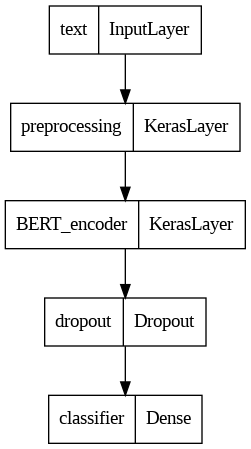

In [ ]:
tf.keras.utils.plot_model(classifier_model)

## Model training

Теперь у нас есть все части для обучения модели, включая модуль предварительной обработки, BERT encoder, data, и classifier.

### Функция ошибки

Поскольку это задача мультилейбл классификации и модель выдает вероятность для каждого класса, мы будем использовать функцию потерь `losses.BinaryCrossentropy`.


In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
# from_logits=True добавляет на выход модели функцию активации 
# metrics = tf.metrics.BinaryAccuracy()

metrics=['accuracy', tf.keras.metrics.AUC(multi_label=True), precision_m, recall_m, f1_m]



### Оптимизатор

Для точной настройки давайте воспользуемся тем же оптимизатором, с которым изначально обучался BERT: Adaptive Moments" (Adam). Этот оптимизатор минимизирует потери при прогнозировании и выполняет регуляризацию путем уменьшения веса (без использования моментов), которая также известна как [AdamW](https://arxiv.org/abs/1711.05101 ).

Для скорости обучения (`init_lr`) вы будете использовать тот же график, что и для предварительной тренировки BERT: линейное уменьшение условной начальной скорости обучения с префиксом линейной фазы разминки в течение первых 10% шагов обучения (`num_warmup_steps`). В соответствии с ЛУЧШЕЙ статьей, начальная скорость обучения меньше для точной настройки (лучше всего 5e-5, 3e-5, 2e-5).

In [ ]:
epochs = 5
steps_per_epoch = 7500
init_learning_rate =  2e-5
num_train_steps = steps_per_epoch * epochs
warmup_steps = int(0.1*num_train_steps)


# Создаем оптимизатор AdamW
optimizer = optimization.create_optimizer(init_lr=init_learning_rate,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=warmup_steps,
                                          optimizer_type='adamw')

### Загрузка модели BERT и обучение

Используя `classifier_model`, созданную ранее, вы можете скомпилировать модель с потерями, метрикой и оптимизатором.

In [ ]:
classifier_model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

In [ ]:
from sklearn.model_selection import train_test_split
df = df.sample(300000, random_state=SEED)

X = df['unifed_text']
y = df['labels'].to_list()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, shuffle=False)


train_ds = (X_train, y_train)
test_ds = (np.array(X_test), np.array(y_test))
val_ds = (np.array(X_val), np.array(y_val))

In [ ]:
print(f'Training model with {tfhub_handle_encoder}')

with tf.device('/device:GPU:0'):
    history = classifier_model.fit(np.array(X_train), np.array(y_train),
                               validation_data=val_ds,
                               epochs=epochs)

Training model with https://tfhub.dev/google/experts/bert/wiki_books/2
Epoch 1/5
 258/7500 [>.............................] - ETA: 1:49:48 - loss: 0.1646 - accuracy: 0.0138 - auc: 0.4633 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - f1_m: 0.0000e+00

### Оценка модели


Давайте посмотрим, как работает модель. Будут возвращены несколько чисел. Потери (число, представляющее ошибку, чем меньше значение, тем лучше) и метрики.

In [ ]:
loss, accuracy, auc, precision, recall,f1  = classifier_model.evaluate(*test_ds)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')
print(f'auc: {auc}')
print(f'F1: {f1}')

### Постройка графика точности и потерь с течением времени

На основе объекта `History`, возвращаемого `model.fit()`. Вы можете построить график потерь при обучении и проверке для сравнения, а также точность при обучении и проверке:

In [ ]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'auc', 'precision_m', 'recall_m', 'f1_m', 'val_loss', 'val_accuracy', 'val_auc', 'val_precision_m', 'val_recall_m', 'val_f1_m'])


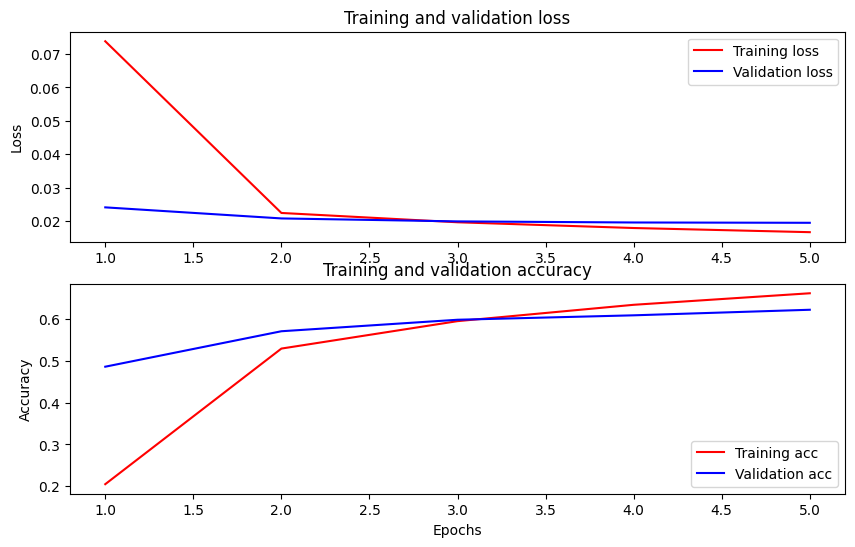

In [ ]:
acc = history_dict['f1_m']
val_acc = history_dict['val_f1_m']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
# r is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')